<a href="https://colab.research.google.com/github/gfidelisp/Jet_Impingement/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mounting Google Drive in Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Accessing the folder

In [2]:
import os
os.chdir('/content/drive/MyDrive/Jet_Impingement')

## Importing packages

In [3]:
# Instalação do detecto
!pip install detecto

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import cv2
import shutil
import math

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as img
import matplotlib.patches as patches

import torch
from torchvision import transforms

from detecto import utils
from detecto import core
from detecto import visualize
from detecto.core import Model
from detecto.utils import reverse_normalize, normalize_transform, _is_iterable

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dropout, RandomRotation
from tensorflow.keras import regularizers
from tensorflow.keras.constraints import unit_norm

# Dectection and location of the test zone

Reading of the trainning and validation sets

In [5]:
utils.xml_to_csv('Data/Input_Data/Annotations/train_labels', 'Data/Input_Data/Annotations/train.csv')
utils.xml_to_csv('Data/Input_Data/Annotations/val_labels', 'Data/Input_Data/Annotations/val.csv')

,filename,width,height,class,xmin,ymin,xmax,ymax,image_id
0,0a066495-M8_125_6.png,640,480,Zona de teste,200,237,430,279,0
1,5fe459e4-M8_225_1.png,640,480,Zona de teste,193,232,435,281,1
2,5d3d6917-M8_225_4.png,640,480,Zona de teste,195,235,427,290,2
3,2f6f1055-M6_75_0.png,640,480,Zona de teste,269,280,483,325,3
4,4ee25673-M6_50_4.png,640,480,Zona de teste,261,276,484,327,4
5,0b9e92db-M8_50_6.png,640,480,Zona de teste,199,230,424,281,5
6,1eec4e93-M6_50_5.png,640,480,Zona de teste,258,279,480,326,6
7,2dafdf9c-M1_125_4.png,640,480,Zona de teste,198,177,414,224,7
8,06bc84db-M1_175_0.png,640,480,Zona de teste,198,178,409,230,8
9,4ffa7006-M6_150_1_6.png,640,480,Zona de teste,258,276,487,328,9


Observing the image

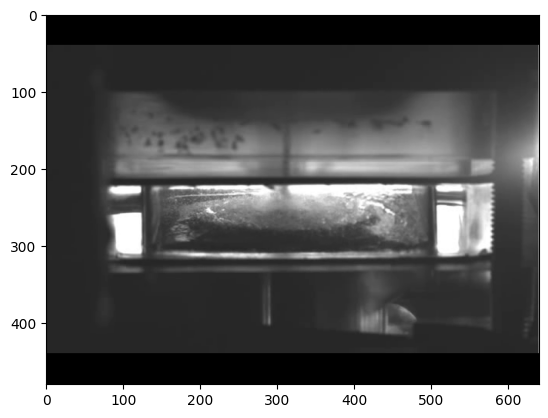

In [6]:
image = img.imread('Data/Input_Data/Annotations/images/5fe459e4-M8_225_1.png')
plt.imshow(image)
plt.show()

Tranforming the image

In [7]:
transform_img = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(800),
    transforms.RandomHorizontalFlip(0.5),
    transforms.ToTensor(),
    utils.normalize_transform(),
])

Transforming the Dataset

In [8]:
dataset = core.Dataset('Data/Input_Data/Annotations/train.csv', 'Data/Input_Data/Annotations/images/', transform=transform_img)

Visuzaliation of the annotated image 

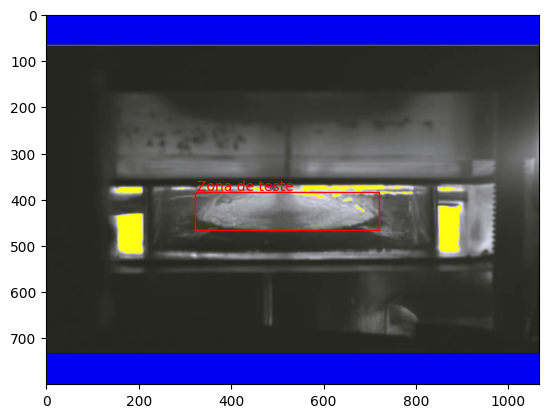

In [9]:
image, information = dataset[50] 
visualize.show_labeled_image(image, information['boxes'], information['labels'])

## Trainning of the classifier

Loading the dataset

In [10]:
dataloader = core.DataLoader(dataset)

Validation set

In [11]:
validation_data = core.Dataset('Data/Input_Data/Annotations/val.csv', 'Data/Input_Data/Annotations/images/')

Defining the categories

In [12]:
categories = ['Zona de teste']
classifier = core.Model(categories)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:02<00:00, 64.8MB/s]


Trainning of the classifier

In [13]:
history = classifier.fit(dataloader, validation_data, epochs = 30, verbose = True)

Epoch 1 of 30
Begin iterating over training dataset


100%|██████████| 157/157 [01:11<00:00,  2.20it/s]


Begin iterating over validation dataset


100%|██████████| 16/16 [00:05<00:00,  3.00it/s]


Loss: 0.0453914477257058
Epoch 2 of 30
Begin iterating over training dataset


100%|██████████| 157/157 [00:41<00:00,  3.77it/s]


Begin iterating over validation dataset


100%|██████████| 16/16 [00:02<00:00,  7.26it/s]


Loss: 0.04230345296673477
Epoch 3 of 30
Begin iterating over training dataset


100%|██████████| 157/157 [00:41<00:00,  3.82it/s]


Begin iterating over validation dataset


100%|██████████| 16/16 [00:02<00:00,  7.65it/s]


Loss: 0.03060907346662134
Epoch 4 of 30
Begin iterating over training dataset


100%|██████████| 157/157 [00:40<00:00,  3.84it/s]


Begin iterating over validation dataset


100%|██████████| 16/16 [00:02<00:00,  7.69it/s]


Loss: 0.026342823228333145
Epoch 5 of 30
Begin iterating over training dataset


100%|██████████| 157/157 [00:40<00:00,  3.85it/s]


Begin iterating over validation dataset


100%|██████████| 16/16 [00:02<00:00,  7.22it/s]


Loss: 0.02519403473706916
Epoch 6 of 30
Begin iterating over training dataset


100%|██████████| 157/157 [00:41<00:00,  3.76it/s]


Begin iterating over validation dataset


100%|██████████| 16/16 [00:02<00:00,  7.48it/s]


Loss: 0.024066600541118532
Epoch 7 of 30
Begin iterating over training dataset


100%|██████████| 157/157 [00:40<00:00,  3.85it/s]


Begin iterating over validation dataset


100%|██████████| 16/16 [00:02<00:00,  7.26it/s]


Loss: 0.024229811504483223
Epoch 8 of 30
Begin iterating over training dataset


100%|██████████| 157/157 [00:42<00:00,  3.66it/s]


Begin iterating over validation dataset


100%|██████████| 16/16 [00:02<00:00,  5.35it/s]


Loss: 0.02380685368552804
Epoch 9 of 30
Begin iterating over training dataset


100%|██████████| 157/157 [00:41<00:00,  3.77it/s]


Begin iterating over validation dataset


100%|██████████| 16/16 [00:02<00:00,  7.13it/s]


Loss: 0.024721199471969157
Epoch 10 of 30
Begin iterating over training dataset


100%|██████████| 157/157 [00:41<00:00,  3.79it/s]


Begin iterating over validation dataset


100%|██████████| 16/16 [00:02<00:00,  6.16it/s]


Loss: 0.023696071526501328
Epoch 11 of 30
Begin iterating over training dataset


100%|██████████| 157/157 [00:42<00:00,  3.72it/s]


Begin iterating over validation dataset


100%|██████████| 16/16 [00:02<00:00,  7.72it/s]


Loss: 0.024548018409404904
Epoch 12 of 30
Begin iterating over training dataset


100%|██████████| 157/157 [00:41<00:00,  3.79it/s]


Begin iterating over validation dataset


100%|██████████| 16/16 [00:02<00:00,  7.50it/s]


Loss: 0.024585186678450555
Epoch 13 of 30
Begin iterating over training dataset


100%|██████████| 157/157 [00:42<00:00,  3.73it/s]


Begin iterating over validation dataset


100%|██████████| 16/16 [00:02<00:00,  7.68it/s]


Loss: 0.024329949461389333
Epoch 14 of 30
Begin iterating over training dataset


100%|██████████| 157/157 [00:42<00:00,  3.68it/s]


Begin iterating over validation dataset


100%|██████████| 16/16 [00:02<00:00,  6.30it/s]


Loss: 0.023903516645077616
Epoch 15 of 30
Begin iterating over training dataset


100%|██████████| 157/157 [00:41<00:00,  3.77it/s]


Begin iterating over validation dataset


100%|██████████| 16/16 [00:02<00:00,  7.53it/s]


Loss: 0.02394377806922421
Epoch 16 of 30
Begin iterating over training dataset


100%|██████████| 157/157 [00:41<00:00,  3.82it/s]


Begin iterating over validation dataset


100%|██████████| 16/16 [00:02<00:00,  7.66it/s]


Loss: 0.02472552499966696
Epoch 17 of 30
Begin iterating over training dataset


100%|██████████| 157/157 [00:41<00:00,  3.81it/s]


Begin iterating over validation dataset


100%|██████████| 16/16 [00:02<00:00,  7.64it/s]


Loss: 0.0248051107628271
Epoch 18 of 30
Begin iterating over training dataset


100%|██████████| 157/157 [00:42<00:00,  3.72it/s]


Begin iterating over validation dataset


100%|██████████| 16/16 [00:02<00:00,  7.63it/s]


Loss: 0.0232354526524432
Epoch 19 of 30
Begin iterating over training dataset


100%|██████████| 157/157 [00:41<00:00,  3.76it/s]


Begin iterating over validation dataset


100%|██████████| 16/16 [00:02<00:00,  7.22it/s]


Loss: 0.02433821139857173
Epoch 20 of 30
Begin iterating over training dataset


100%|██████████| 157/157 [00:40<00:00,  3.84it/s]


Begin iterating over validation dataset


100%|██████████| 16/16 [00:02<00:00,  7.50it/s]


Loss: 0.022595162387005985
Epoch 21 of 30
Begin iterating over training dataset


100%|██████████| 157/157 [00:40<00:00,  3.89it/s]


Begin iterating over validation dataset


100%|██████████| 16/16 [00:02<00:00,  7.35it/s]


Loss: 0.02433354948880151
Epoch 22 of 30
Begin iterating over training dataset


100%|██████████| 157/157 [00:40<00:00,  3.89it/s]


Begin iterating over validation dataset


100%|██████████| 16/16 [00:02<00:00,  7.56it/s]


Loss: 0.022965754906181246
Epoch 23 of 30
Begin iterating over training dataset


100%|██████████| 157/157 [00:40<00:00,  3.89it/s]


Begin iterating over validation dataset


100%|██████████| 16/16 [00:02<00:00,  7.68it/s]


Loss: 0.023317537154071033
Epoch 24 of 30
Begin iterating over training dataset


100%|██████████| 157/157 [00:40<00:00,  3.88it/s]


Begin iterating over validation dataset


100%|██████████| 16/16 [00:02<00:00,  7.69it/s]


Loss: 0.023707187559921294
Epoch 25 of 30
Begin iterating over training dataset


100%|██████████| 157/157 [00:40<00:00,  3.89it/s]


Begin iterating over validation dataset


100%|██████████| 16/16 [00:02<00:00,  7.71it/s]


Loss: 0.023590684635564685
Epoch 26 of 30
Begin iterating over training dataset


100%|██████████| 157/157 [00:40<00:00,  3.90it/s]


Begin iterating over validation dataset


100%|██████████| 16/16 [00:02<00:00,  7.65it/s]


Loss: 0.0238570460351184
Epoch 27 of 30
Begin iterating over training dataset


100%|██████████| 157/157 [00:40<00:00,  3.91it/s]


Begin iterating over validation dataset


100%|██████████| 16/16 [00:02<00:00,  7.66it/s]


Loss: 0.024028344196267426
Epoch 28 of 30
Begin iterating over training dataset


100%|██████████| 157/157 [00:40<00:00,  3.89it/s]


Begin iterating over validation dataset


100%|██████████| 16/16 [00:02<00:00,  7.27it/s]


Loss: 0.02413112809881568
Epoch 29 of 30
Begin iterating over training dataset


100%|██████████| 157/157 [00:40<00:00,  3.89it/s]


Begin iterating over validation dataset


100%|██████████| 16/16 [00:02<00:00,  7.44it/s]


Loss: 0.024201618740335107
Epoch 30 of 30
Begin iterating over training dataset


100%|██████████| 157/157 [00:40<00:00,  3.89it/s]


Begin iterating over validation dataset


100%|██████████| 16/16 [00:02<00:00,  7.63it/s]

Loss: 0.02294006384909153


Saving the model

In [14]:
classifier.save('Data/Output_Data/Annotations/Models/Zona_de_Teste.pth')

Loading the models

In [15]:
#classifier = Model.load('Data/Output_Data/Annotations//Models/Zona_de_Teste.pth', ['Zona de Teste'])

Applying the classifier in a video file

In [16]:
def detect_video_1(model, input_file, output_file, fps=30, score_filter=0.6):
    """Takes in a video and produces an output video with object detection
    run on it (i.e. displays boxes around detected objects in real-time).
    Output videos should have the .avi file extension. Note: some apps,
    such as macOS's QuickTime Player, have difficulty viewing these
    output videos. It's recommended that you download and use
    `VLC <https://www.videolan.org/vlc/index.html>`_ if this occurs.
    :param model: The trained model with which to run object detection.
    :type model: detecto.core.Model
    :param input_file: The path to the input video.
    :type input_file: str
    :param output_file: The name of the output file. Should have a .avi
        file extension.
    :type output_file: str
    :param fps: (Optional) Frames per second of the output video.
        Defaults to 30.
    :type fps: int
    :param score_filter: (Optional) Minimum score required to show a
        prediction. Defaults to 0.6.
    :type score_filter: float
    **Example**::
        >>> from detecto.core import Model
        >>> from detecto.visualize import detect_video
        >>> model = Model.load('model_weights.pth', ['tick', 'gate'])
        >>> detect_video(model, 'input_vid.mp4', 'output_vid.avi', score_filter=0.7)
    """

    # Read in the video
    video = cv2.VideoCapture(input_file)

    # Video frame dimensions
    frame_width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Scale down frames when passing into model for faster speeds
    scaled_size = 800
    scale_down_factor = min(frame_height, frame_width) / scaled_size

    # The VideoWriter with which we'll write our video with the boxes and labels
    # Parameters: filename, fourcc, fps, frame_size
    out = cv2.VideoWriter(output_file, cv2.VideoWriter_fourcc(*'DIVX'), fps, (frame_width, frame_height))

    # Transform to apply on individual frames of the video
    transform_frame = transforms.Compose([  # TODO Issue #16
        transforms.ToPILImage(),
        transforms.Resize(scaled_size),
        transforms.ToTensor(),
        normalize_transform(),
    ])

    # Loop through every frame of the video
    while True:
        ret, frame = video.read()
        # Stop the loop when we're done with the video
        if not ret:
            break

        # The transformed frame is what we'll feed into our model
        # transformed_frame = transform_frame(frame)
        transformed_frame = frame  # TODO: Issue #16
        predictions = model.predict(transformed_frame)

        # Add the top prediction of each class to the frame
        for label, box, score in zip(*predictions):
            if score < score_filter:
                continue

            # Since the predictions are for scaled down frames,
            # we need to increase the box dimensions
            # box *= scale_down_factor  # TODO Issue #16

            # Create the box around each object detected
            # Parameters: frame, (start_x, start_y), (end_x, end_y), (r, g, b), thickness

            cv2.rectangle(frame, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), (255, 0, 0), 3)

            # Write the label and score for the boxes
            # Parameters: frame, text, (start_x, start_y), font, font scale, (r, g, b), thickness
            cv2.putText(frame, '{}: {}'.format(label, round(score.item(), 2)), (int(box[0]), int(box[1]) - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 3)

        # Write this frame to our video file
        out.write(frame)

        # If the 'q' key is pressed, break from the loop
        key = cv2.waitKey(1) & 0xFF
        if key == ord('q'):
            break

    # When finished, release the video capture and writer objects
    video.release()
    out.release()

    # Close all the frames
    cv2.destroyAllWindows()

Applying the classifier in the video files

In [17]:
detect_video_1(classifier, 'Data/Input_Data/Annotations/Videos/M1_25.mp4','Data/Output_Data/Annotations/Videos/M1_25_box.avi')

In [18]:
detect_video_1(classifier, 'Data/Input_Data/Annotations/Videos/M6_225.mp4','Data/Output_Data/Annotations/Videos/M6_225_box.avi')

In [19]:
detect_video_1(classifier, 'Data/Input_Data/Annotations/Videos/M8_100.mp4','Data/Output_Data/Annotations/Videos/M8_100_box.avi')

# Capturing the frames

List with the videos that will be evaluated


In [20]:
Video_list = os.listdir('Data/Input_Data/Videos')

Function for capturing the frames.

In [21]:
for i in Video_list:

    # Loading the video 
    Vid = cv2.VideoCapture('Data/Input_Data/Videos/'+ i)

    # Setting the capture interval 
    frameRate = 1*Vid.get(5)

    # Current frame
    currentframe = 0
    
    while(True):

        frameId = Vid.get(1)

        # Loading the frame
        ret,frame = Vid.read()
    
        if ret:
            if (frameId % math.floor(frameRate) == 0):
                # Creating the image
                name = 'Data/Output_Data/Frames/' + str(i[:-4]) + '_' + str(currentframe) + '.png'
                print ('Creating...' + name)
        
                # Saving the image
                cv2.imwrite(name, frame)
        
                # Counter
                currentframe += 1
        else:
            break
            
cv2.destroyAllWindows()

# Cutting the frames in the test zone

Lista com os frames sendo avaliados

In [22]:
frames_list = os.listdir('Data/Output_Data/Frames')

Function for cutting the frames

In [23]:
for i in frames_list:
  im = cv2.imread("Data/Output_Data/Frames/" + i)

  #### Determinando as coordenadas da zona de teste
  predictions = classifier.predict(im)
  labels, box, scores = predictions

  left = int(box[0][0])
  right = int(box[0][2])
  top = int(box[0][3])
  bottom = int(box[0][1]) + 10

  ##### Salvando a imagem recortada
  im_crop = im[bottom:top, left:right]
  name = 'Data/Output_Data/Frames_Cropped/' + str(i[:-4])+ '.png'
  cv2.imwrite(name, im_crop)

  #### Contador
  print(i)

Streaming output truncated to the last 5000 lines.
M8_125_259.png
M8_125_260.png
M8_125_261.png
M8_125_262.png
M8_125_263.png
M8_125_264.png
M8_125_265.png
M8_125_266.png
M8_125_267.png
M8_125_268.png
M8_125_269.png
M8_125_270.png
M8_125_271.png
M8_125_272.png
M8_125_273.png
M8_125_274.png
M8_125_275.png
M8_125_276.png
M8_125_277.png
M8_125_278.png
M8_125_279.png
M8_125_280.png
M8_125_281.png
M8_125_282.png
M8_125_283.png
M8_125_284.png
M8_125_285.png
M8_125_286.png
M8_125_287.png
M8_125_288.png
M8_125_289.png
M8_125_290.png
M8_125_291.png
M8_125_292.png
M8_125_293.png
M8_125_294.png
M8_125_295.png
M8_125_296.png
M8_125_297.png
M8_125_298.png
M8_125_299.png
M8_125_300.png
M8_125_301.png
M8_125_302.png
M8_125_303.png
M8_125_304.png
M8_125_305.png
M8_125_306.png
M8_125_307.png
M8_125_308.png
M8_125_309.png
M8_125_310.png
M8_125_311.png
M8_125_312.png
M8_125_313.png
M8_125_314.png
M8_125_315.png
M8_125_316.png
M8_125_317.png
M8_125_318.png
M8_125_319.png
M8_125_320.png
M8_125_321.png
M8_1

Train Test Split

In [24]:
data_dir = "Data/Output_Data/Sets/"

#create training dir
training_dir = os.path.join(data_dir,"training")
if not os.path.isdir(training_dir):
  os.mkdir(training_dir)

#create ok dir in training
ok_training_dir = os.path.join(training_dir,"Ok")
if not os.path.isdir(ok_training_dir):
  os.mkdir(ok_training_dir)

#create crit dir in training
crit_training_dir = os.path.join(training_dir,"Crit")
if not os.path.isdir(crit_training_dir):
  os.mkdir(crit_training_dir)

#create validation dir
validation_dir = os.path.join(data_dir,"validation")
if not os.path.isdir(validation_dir):
  os.mkdir(validation_dir)

#create ok in validation
ok_validation_dir = os.path.join(validation_dir,"Ok")
if not os.path.isdir(ok_validation_dir):
  os.mkdir(ok_validation_dir)

#create cat in validation
crit_validation_dir = os.path.join(validation_dir,"Crit")
if not os.path.isdir(crit_validation_dir):
  os.mkdir(crit_validation_dir)

#create ok dir
ok_dir = os.path.join(data_dir,"Ok")
if not os.path.isdir(ok_dir):
  os.mkdir(ok_dir)

#create crit dir
crit_dir = os.path.join(data_dir,"Crit")
if not os.path.isdir(crit_dir):
  os.mkdir(crit_dir)

In [25]:
#### Pasta com os frames
path = "Data/Output_Data/Frames_Cropped/"

#### Carrendo a lista com todas as imagens 
frames_list = os.listdir(path)

In [26]:
for i in frames_list:
  if i[3:6] == "225":
    shutil.copy(path + i, crit_dir +'/'+ i)
  else:
    shutil.copy(path + i, ok_dir +'/'+ i)

split_size = 0.80
ok_imgs_size = len(os.listdir(ok_dir))
crit_imgs_size = len(os.listdir(crit_dir))

for i,img in enumerate(os.listdir(crit_dir)):
  if i < (crit_imgs_size * split_size):
    shutil.move(crit_dir + '/' + img,crit_training_dir)
  else:
    shutil.move(crit_dir + '/' + img,crit_validation_dir)

for i,img in enumerate(os.listdir(ok_dir)):
  if i < (ok_imgs_size * split_size):
    shutil.move(ok_dir + '/' + img,ok_training_dir)
  else:
    shutil.move(ok_dir + '/' + img,ok_validation_dir)

Limiarization

In [28]:
# Folder with the trainning set
path_train = "Data/Output_Data/Sets/training"

# Loading a list with all images
frames_list_crit = os.listdir(path_train + '/Crit')
frames_list_ok = os.listdir(path_train + '/Ok')
frames_list = frames_list_crit + frames_list_ok

Avaliando uma imagem

Caso M8_50_304.png


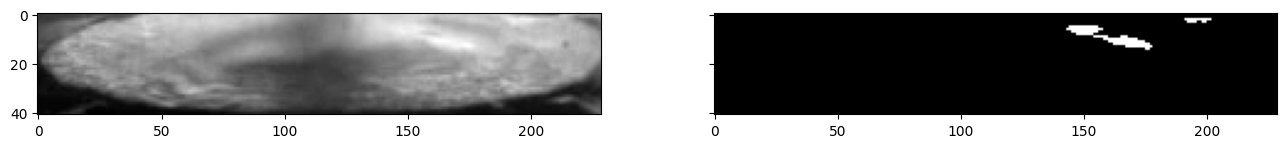

In [29]:
# Folder with all the frames
path = "Data/Output_Data/Frames_Cropped/"

#Threshold level
thresh = 200

# Loading the image
src = cv2.imread(path + frames_list[2780],cv2.IMREAD_GRAYSCALE)
print("Caso " + str(frames_list[2780]))

# Applying the Threshold
th, dst = cv2.threshold(src, thresh = thresh, maxval = 255, type = eval('cv2.THRESH_BINARY'))

# Plotting original and limiarized images
fig, axes = plt.subplots(1, 2, figsize=(16, 12), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(src,'gray')
ax[1].imshow(dst,'gray')

Applying limiarization in all images

In [30]:
def limi(thresh):
    
    # List initialization
    im_thresh = []
    Case = []
    q = []
    Area_Not = []
    Area_OK = []

    for j,i in enumerate(frames_list):

        # Observe the evolution of the algorithm
        if np.round(j%((len(frames_list)-1)/100),0) == 0:
            print("There were treated " + str(np.round(j/len(frames_list)*100,0)) + "% of the images for a threshhold of " + str(thresh))

        # Carregando a imagem
        src = cv2.imread(path + i,cv2.IMREAD_GRAYSCALE)

        # Aplicando a limiarização 
        th, dst = cv2.threshold(src, thresh = thresh, maxval = 255, type = eval('cv2.THRESH_BINARY'))

        # Adicionando o resultado para a lista 
        im_thresh.append((dst == 255).sum()/np.size(dst)*100)
        Case.append(i[1:3].replace('_', ''))
        q.append(i[3:6].replace('_', ''))
        if i[3:6].replace('_', '') == '225':
            Area_Not.append((dst == 255).sum()/np.size(dst)*100)
        else:
            Area_OK.append((dst == 255).sum()/np.size(dst)*100)

    itv = np.linspace(0,101,5000)

    FP = []
    FN = []

    for i in itv:
        FP.append((Area_OK >= i).sum()/len(Area_OK))
        FN.append((Area_Not <= i).sum()/len(Area_Not))
    
    return im_thresh, FP, FN, q, itv


In [31]:
# Array with the threshholds to be evaluated
threshes = np.array([180, 200, 220, 240])

In [32]:
# Empty lists
FP = []
FN = []

# Calculation of False Positives and False Negatives
for i in threshes:
    im_thresh_t, FP_t, FN_t, q, itv = limi(i)
    FP.append(FP_t)
    FN.append(FN_t)

There were treated 0.0% of the images for a threshhold of 180
There were treated 1.0% of the images for a threshhold of 180
There were treated 3.0% of the images for a threshhold of 180
There were treated 5.0% of the images for a threshhold of 180
There were treated 6.0% of the images for a threshhold of 180
There were treated 8.0% of the images for a threshhold of 180
There were treated 10.0% of the images for a threshhold of 180
There were treated 11.0% of the images for a threshhold of 180
There were treated 13.0% of the images for a threshhold of 180
There were treated 15.0% of the images for a threshhold of 180
There were treated 16.0% of the images for a threshhold of 180
There were treated 18.0% of the images for a threshhold of 180
There were treated 20.0% of the images for a threshhold of 180
There were treated 21.0% of the images for a threshhold of 180
There were treated 23.0% of the images for a threshhold of 180
There were treated 25.0% of the images for a threshhold of 18

The value of theAUC for the threshhold of 180 is 0.9320383034260938
The value of theAUC for the threshhold of 200 is 0.9924352444311922
The value of theAUC for the threshhold of 220 is 0.9936492127658535
The value of theAUC for the threshhold of 240 is 0.989449449351589


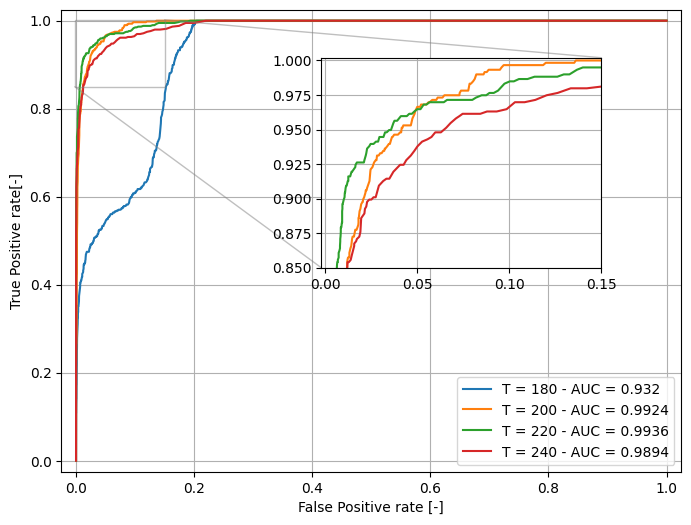

In [33]:
# plot of the ROC e calculation of the AUC-ROC
fig, ax = plt.subplots(figsize = (8,6))

# Empty list
AUC = []

for i in range(len(FP)):
    # Calculation of the da AUC-ROC
    AUC_i = np.sum((np.array(FN[i][1:]) - np.array(FN[i][:-1]))*((1-np.array(FP[i][1:]))/2 + (1-np.array(FP[i][:-1]))/2))
    AUC.append(AUC_i)
    print("The value of theAUC for the threshhold of " +str(threshes[i]) + " is " + str(AUC_i)) 
    
    # Plot of the ROC
    plt.plot(FP[i],1 - np.array(FN[i]), label = 'T = ' + str(threshes[i]) + ' - AUC = ' + str(np.round(AUC_i,4)))



plt.xlim([-0.025,1.025])
plt.ylim([-0.025,1.025])

plt.grid()
plt.legend()

plt.ylabel('True Positive rate[-]')
plt.xlabel('False Positive rate [-]')

ax_new = fig.add_axes([0.45, 0.45, 0.35, 0.35])
for i in range(len(FP)):
    ax_new.plot(FP[i],1 - np.array(FN[i]))

ax_new.set_xlim([-0.002, 0.15])
ax_new.set_ylim([0.85, 1.002])
ax.indicate_inset_zoom(ax_new)

ax_new.grid()
plt.savefig("Plots/Threshold/ROC.pdf", format="pdf", bbox_inches = "tight")

In [34]:
# Determination of the threshold of maximum AUC
thresh = threshes[np.array(AUC).argmax()]

In [35]:
im_thresh, FP, FN, q,itv = limi(thresh)

There were treated 0.0% of the images for a threshhold of 220
There were treated 1.0% of the images for a threshhold of 220
There were treated 3.0% of the images for a threshhold of 220
There were treated 5.0% of the images for a threshhold of 220
There were treated 6.0% of the images for a threshhold of 220
There were treated 8.0% of the images for a threshhold of 220
There were treated 10.0% of the images for a threshhold of 220
There were treated 11.0% of the images for a threshhold of 220
There were treated 13.0% of the images for a threshhold of 220
There were treated 15.0% of the images for a threshhold of 220
There were treated 16.0% of the images for a threshhold of 220
There were treated 18.0% of the images for a threshhold of 220
There were treated 20.0% of the images for a threshhold of 220
There were treated 21.0% of the images for a threshhold of 220
There were treated 23.0% of the images for a threshhold of 220
There were treated 25.0% of the images for a threshhold of 22

In [36]:
data={'Q': q,'TH':im_thresh}
df=pd.DataFrame(data)

In [37]:
q = df['Q'].value_counts().index

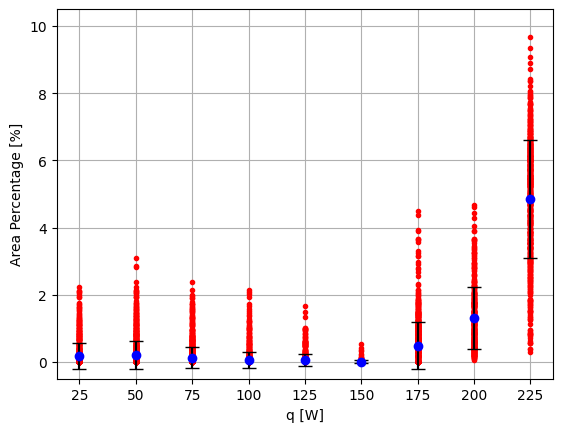

In [38]:
# Empty lists for the mean and standard deviation values
mean = []
std = []

# Calculation of the mean values, standard deviation and plot of the results
for i in range(9):
    mean.append(df[df['Q'] == str(q[i])]['TH'].mean())
    std.append(df[df['Q'] == str(q[i])]['TH'].std())

    plt.plot(float(q[i])*np.ones(len(df[df['Q'] == str(q[i])]['TH'])), df[df['Q'] == str(q[i])]['TH'],'r.')
plt.grid()
plt.xlabel('q [W]')
plt.ylim([-0.5,10.5])
plt.ylabel('Area Percentage [%]')
plt.errorbar(np.float_(q[:9]),mean, std, color='blue', marker='o', linestyle='')
plt.errorbar(np.float_(q[:9]),mean, std, color='black', linestyle='',capsize=5)
plt.savefig('Plots/Threshold/Threshold_full.pdf', format = 'pdf',bbox_inches='tight')

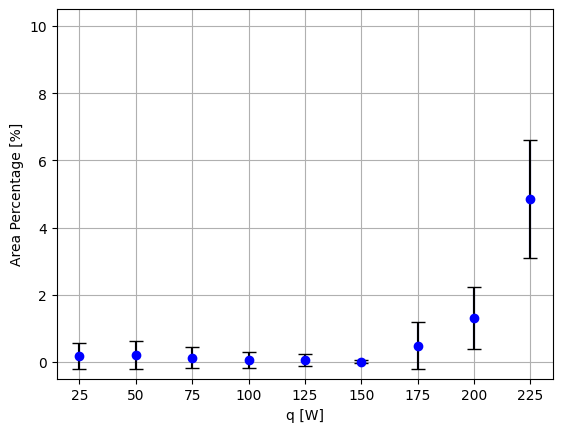

In [39]:
# Plot of the mean and standard deviation values
plt.grid()
plt.xlabel('q [W]')
plt.ylabel('Area Percentage [%]')
plt.ylim([-0.5,10.5])
plt.errorbar(np.float_(q[:9]),mean, std, color='blue', marker='o', linestyle='')
plt.errorbar(np.float_(q[:9]),mean, std, color='black', linestyle='',capsize=5)
plt.savefig('Plots/Threshold/Threshold.pdf', format = 'pdf', bbox_inches='tight')

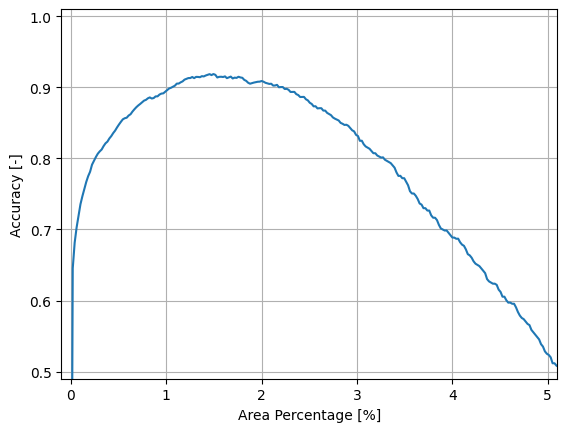

In [40]:
plt.plot(itv, 1 - (np.array(FP) + np.array(FN)))
plt.xlim([-0.1,5.1])
plt.ylim([0.49,1.01])
plt.grid()
plt.ylabel('Accuracy [-]')
plt.xlabel('Area Percentage [%]')
plt.savefig('Plots/Threshold/Acurácia.pdf', format = 'pdf', bbox_inches='tight')

In [41]:
index = np.array(1 - (np.array(FP) + np.array(FN))).argmax()

print("The accuracy for the trainning set is of " + str(np.round(np.array(1 - (np.array(FP) + np.array(FN)))[index], 4)) + " for a threshold of " + str(np.round(itv[index] ,3)))

The accuracy for the trainning set is of 0.9186 for a threshold of 1.495


In [42]:
# Folder with the validation set
path_test = "Data/Output_Data/Sets/validation"

# Loading all of the images
frames_list_crit = os.listdir(path_test + '/Crit')
frames_list_ok = os.listdir(path_test + '/Ok')
frames_list = frames_list_crit + frames_list_ok

In [43]:
# Updating the values
im_thresh, FP, FN, q,itv = limi(thresh)

There were treated 0.0% of the images for a threshhold of 220
There were treated 1.0% of the images for a threshhold of 220
There were treated 3.0% of the images for a threshhold of 220
There were treated 4.0% of the images for a threshhold of 220
There were treated 6.0% of the images for a threshhold of 220
There were treated 9.0% of the images for a threshhold of 220
There were treated 11.0% of the images for a threshhold of 220
There were treated 12.0% of the images for a threshhold of 220
There were treated 14.0% of the images for a threshhold of 220
There were treated 17.0% of the images for a threshhold of 220
There were treated 19.0% of the images for a threshhold of 220
There were treated 20.0% of the images for a threshhold of 220
There were treated 22.0% of the images for a threshhold of 220
There were treated 25.0% of the images for a threshhold of 220
There were treated 28.0% of the images for a threshhold of 220
There were treated 30.0% of the images for a threshhold of 22

In [44]:
print("The accuracy for the validation set is of " + str(np.round(np.array(1 - (np.array(FP) + np.array(FN)))[index], 4)) + " for a threshold of " + str(np.round(itv[index] ,3)))

The accuracy for the validation set is of 0.8316 for a threshold of 1.495


# Deep Learning

In [72]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory(training_dir + '/',
                                          target_size=(150,150),
                                          batch_size = 25,
                                          class_mode = 'binary')
                                         
validation_dataset = test.flow_from_directory(validation_dir + '/',
                                        target_size=(150,150),
                                        batch_size =25,
                                        class_mode = 'binary')

Found 7461 images belonging to 2 classes.
Found 1864 images belonging to 2 classes.


In [73]:
validation_dataset.class_indices

{'Crit': 0, 'Ok': 1}

In [74]:
model = keras.Sequential()

model.add(tf.keras.layers.RandomRotation(0.4))

# Convolutional and Pooling Layers 1
model.add(keras.layers.Conv2D(32,(3,3),activation='tanh', kernel_initializer='he_normal',input_shape=(150,150,3)))
model.add(Dropout(0.4))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional and Pooling Layers 2
model.add(keras.layers.Conv2D(64,(3,3),activation='tanh'))
model.add(Dropout(0.4))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional and Pooling Layers 3
#model.add(keras.layers.Conv2D(128,(3,3),activation='tanh'))
#model.add(Dropout(0.4))
#model.add(keras.layers.MaxPool2D(2,2))

# Convolutional and Pooling Layers 4
#model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
#model.add(Dropout(0.4))
#model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Flatten())

# Fully Connected Layer 1
model.add(keras.layers.Dense(10,activation='tanh'))
model.add(Dropout(0.2))

# Output Layer
model.add(keras.layers.Dense(1,activation='tanh'))

In [75]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [77]:
history = model.fit(train_dataset,
         steps_per_epoch = 1,
         epochs = 20,
         #batch_size = 1000,
         validation_data = validation_dataset,
         validation_steps=1
         )

Epoch 1/20
1/1 [==============================] - 172s 172s/step - loss: 0.8567 - accuracy: 0.8800 - val_loss: 0.3534 - val_accuracy: 0.9600
Epoch 2/20
1/1 [==============================] - 3s 3s/step - loss: 1.6681 - accuracy: 0.8000 - val_loss: 1.0584 - val_accuracy: 0.8800
Epoch 3/20
1/1 [==============================] - 4s 4s/step - loss: 0.4478 - accuracy: 0.9600 - val_loss: 1.4091 - val_accuracy: 0.8400
Epoch 4/20
1/1 [==============================] - 5s 5s/step - loss: 0.2230 - accuracy: 0.9600 - val_loss: 1.7591 - val_accuracy: 0.8000
Epoch 5/20
1/1 [==============================] - 3s 3s/step - loss: 0.4492 - accuracy: 0.9600 - val_loss: 0.7029 - val_accuracy: 0.9200
Epoch 6/20
1/1 [==============================] - 3s 3s/step - loss: 3.9258e-04 - accuracy: 1.0000 - val_loss: 0.3511 - val_accuracy: 0.9600
Epoch 7/20
1/1 [==============================] - 3s 3s/step - loss: 1.9278 - accuracy: 0.8000 - val_loss: 0.7010 - val_accuracy: 0.9200
Epoch 8/20
1/1 [=================

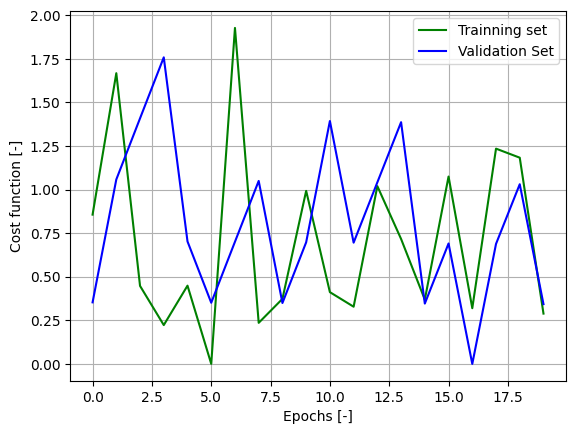

In [78]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,20)
plt.plot(epochs, loss_train, 'g', label='Trainning set')
plt.plot(epochs, loss_val, 'b', label='Validation Set')
plt.xlabel('Epochs [-]')
plt.ylabel('Cost function [-]')
plt.grid()
plt.legend()

#plt.savefig('Plots/Deep/Custo.pdf', format = 'pdf', bbox_inches='tight')

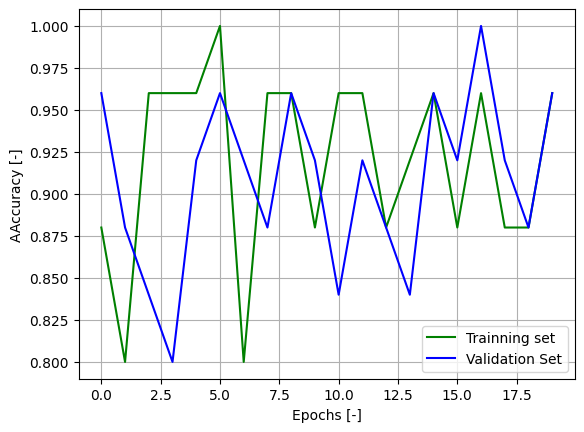

In [79]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,20)
plt.plot(epochs, acc_train, 'g', label='Trainning set')
plt.plot(epochs, acc_val, 'b', label='Validation Set')
plt.xlabel('Epochs [-]')
plt.ylabel('AAccuracy [-]')
plt.grid()
plt.legend()

#plt.savefig('Plots/Deep/Acc.pdf', format = 'pdf', bbox_inches='tight')